Q: How's the cancel rate?
    
Q: Which country is the travellers mostly from?
    
Q: Peak season and slow season.
    
Q: Average nights spent.

Q: Ratio of travelling with kids 
    
 

___

In [29]:
# import libaries 

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 


In [30]:
# import csv file
df = pd.read_csv('/Users/melody/Downloads/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [31]:
df.shape

(119390, 36)

<h2>Data Preparation

In [126]:
# check for missing values 
df.isnull().sum()

In [124]:
# drop meaningless column and get rid of the missing values
df=df.drop(['company','agent'], axis = 1)


<h2>Data Exploratory Analysis 

<h3>What's the booking cancel rate?

In [117]:
# to get the yearly booking cancel rate
df1 = df.groupby('arrival_date_month').is_canceled.value_counts()
df2 = df['is_canceled'].value_counts(normalize =True)
df2

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

The booking cancel rate is 37%. 

In [132]:
# count the number of cancellation by month 
count_cancel= pd.DataFrame(df.groupby('arrival_date_month').sum().astype('int'))

# sort by arrival_date_month
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
month_sorted = count_cancel.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))   
month_sorted

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,freq_count,sum_night
arrival_date_month,,,,,,,,,,,,,,,,,,,,
January,1807,268643,11956545,17711,95560,4621,12997,10024,452,48,397,530,1807,1469,14979,417171,491,3246,35153041,17618
February,2696,386131,16269265,59795,127071,6883,17572,14450,790,59,411,607,1427,1548,6171,593661,509,4241,65092624,24455
March,3149,686748,19749674,113515,159987,8410,25079,17675,700,57,426,266,1806,2173,13486,790176,603,4872,95922436,33489
April,4524,1051491,22361085,177392,180852,10520,26815,20806,1141,53,283,472,1427,2503,33405,1113122,633,5783,122965921,37335
May,4677,1387166,23776969,239006,189001,10254,28380,21539,845,72,366,216,1831,2561,51162,1281628,614,6280,139027681,38634
June,4535,1402897,22058671,268613,165390,10068,29048,20353,1057,71,282,236,1703,2103,21387,1276277,609,6169,119661721,39116
July,4742,1725980,25527113,367133,203974,14184,35521,25164,2322,121,301,1476,1600,2756,2911,1605263,869,8505,160300921,49705
August,5239,1681028,27977068,463805,217742,14716,39361,27795,2780,196,223,948,774,3674,5533,1944327,1000,10223,192571129,54077
September,4116,1436183,21179014,400290,167080,9899,26526,19681,598,87,201,3038,784,2072,44364,1103861,547,5268,110418064,36425


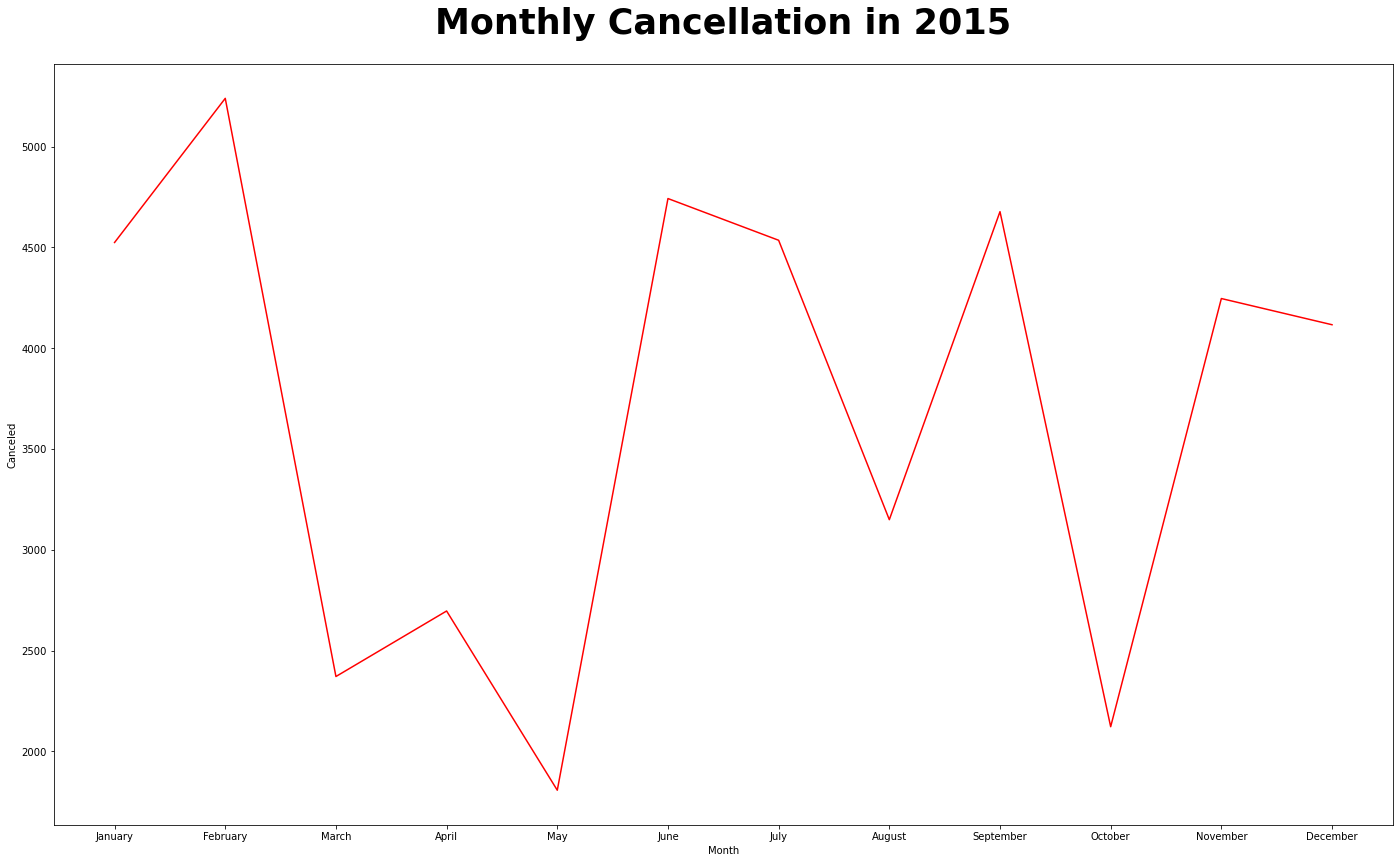

In [139]:
# plot monthly sales trend 
plt.figure(figsize=(24, 14))
plt.plot(month_sorted.index.values,count_cancel['is_canceled'],color="r")
plt.xlabel('Month')
plt.ylabel('Canceled')
plt.title('Monthly Cancellation in 2015',  weight="bold", 
    fontsize=35, 
    pad=30 )
plt.show()

The highest months of cancellations are Februrary, June, and September, whereas the lowest cancellation is in May and October. 

<h3> Where do travelers most come from?

In [17]:
# group the travellers by country
count_country=df.groupby(by='country')['name'].count()

# Sort the number of travellers by country in descending order 
count_country=count_country.sort_values(ascending=False)
df_count_country=pd.DataFrame(count_country)

count_country

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
MMR        1
MRT        1
SMR        1
PYF        1
Name: name, Length: 177, dtype: int64

There are travelers from 177 countries.
The travelers mostly come from Portugal, UK, France, Spain, and Germany. 

<h3>When is peak season and slow season?

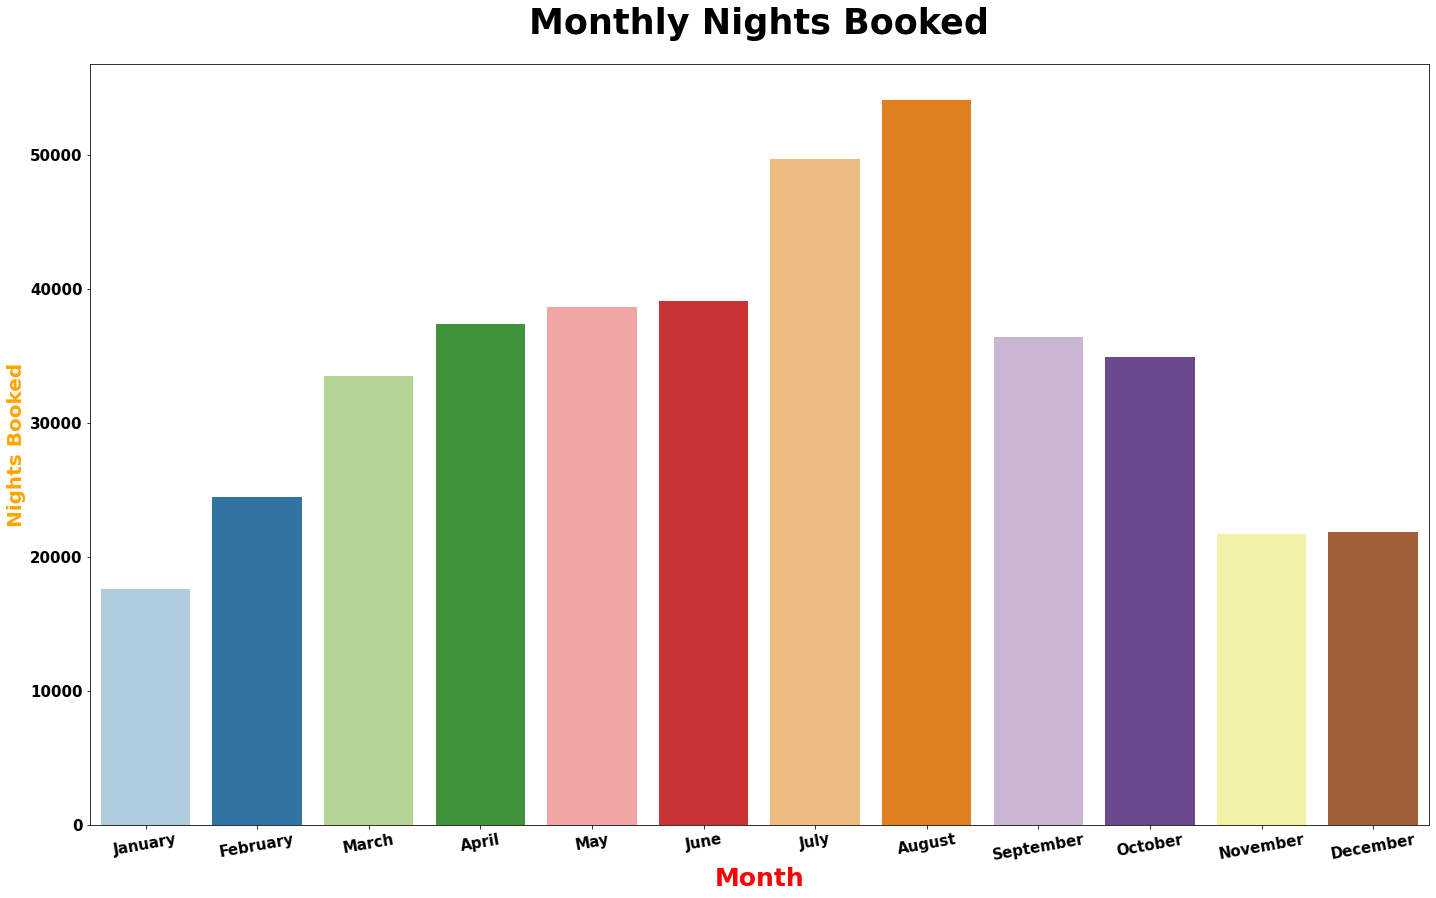

In [136]:
plt.figure(figsize=(24, 14))

sns.barplot( 
    x=month_sorted.index, 
    y=month_sorted["sum_night"], 
    data=month_sorted, 
    palette="Paired" )

# graph customization 

plt.title( 
    "Monthly Nights Booked", 
    weight="bold", 
    fontsize=35, 
    pad=30 )
plt.xlabel( 
    "Month", 
    weight="bold", 
    color="red", 
    fontsize=25, 
    loc="center" )
plt.xticks( 
    weight="bold", 
    fontsize=15, 
    rotation=10)
plt.ylabel( 
    "Nights Booked", 
    weight="bold", 
    color="orange", 
    fontsize=20 )
plt.yticks( 
    weight="bold", 
    fontsize=15 );

The peak season is in July and August. November, December, and January are relatively slow. 

<h3>What's the ratio of traveling with kids

In [140]:
# add up the number of children and babies 
month_sorted['underage'] = month_sorted['children']+month_sorted['babies']
underage_ratio = 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,freq_count,sum_night,underage
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
January,1807,268643,11956545,17711,95560,4621,12997,10024,452,48,...,530,1807,1469,14979,417171,491,3246,35153041,17618,500
February,2696,386131,16269265,59795,127071,6883,17572,14450,790,59,...,607,1427,1548,6171,593661,509,4241,65092624,24455,849
March,3149,686748,19749674,113515,159987,8410,25079,17675,700,57,...,266,1806,2173,13486,790176,603,4872,95922436,33489,757
April,4524,1051491,22361085,177392,180852,10520,26815,20806,1141,53,...,472,1427,2503,33405,1113122,633,5783,122965921,37335,1194
May,4677,1387166,23776969,239006,189001,10254,28380,21539,845,72,...,216,1831,2561,51162,1281628,614,6280,139027681,38634,917
June,4535,1402897,22058671,268613,165390,10068,29048,20353,1057,71,...,236,1703,2103,21387,1276277,609,6169,119661721,39116,1128
July,4742,1725980,25527113,367133,203974,14184,35521,25164,2322,121,...,1476,1600,2756,2911,1605263,869,8505,160300921,49705,2443
August,5239,1681028,27977068,463805,217742,14716,39361,27795,2780,196,...,948,774,3674,5533,1944327,1000,10223,192571129,54077,2976
September,4116,1436183,21179014,400290,167080,9899,26526,19681,598,87,...,3038,784,2072,44364,1103861,547,5268,110418064,36425,685


In [147]:
#sum_adults = month_sorted['adults'].sum()
#sum_adults
underage_ratio = month_sorted['underage'].sum()/(month_sorted['underage'].sum()+month_sorted['adults'].sum())
print('The ratio of traveling with kids is '+str(round(underage_ratio,2)*100) +' %.')

The ratio of traveling with kids is 6.0 %.


<h3>What's the Average number of nights spent?

In [90]:
# to sum up the night stay in weekends nights and in week nights columns
df['sum_night']= df.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
average = df['sum_night'].mean()
np.round(average,2)
print('The Average number of nights spent is '+ str(np.round(average,2)) +' nights.')

The Average number of nights spent is 3.43 nights.
